**Importing the neccessary libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [18]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

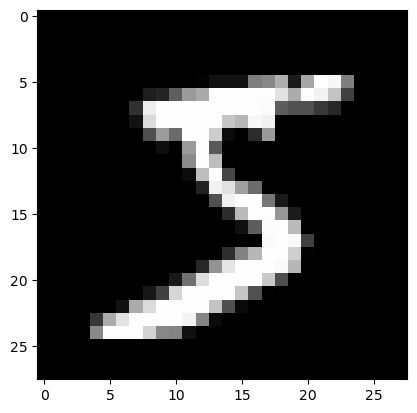

In [4]:
plt.imshow(X_train[0], cmap='gray')

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#one hot encoding requires to divide the data by 255 since it is from 0-255
X_train = X_train/255
X_test = X_test/255

In [6]:
#check the encoding step
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
# Reshape the image data to two-dimensional arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [9]:
# Define the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('The Accuracy of the Model:', accuracy)

The Accuracy of the Model: 0.9688


In [10]:
# Define the Support Vector Machine classifier
svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('The Accuracy of the Model:', accuracy)

The Accuracy of the Model: 0.9792


In [11]:
# Define the Multi-layer Perceptron classifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100)

# Train the classifier
mlp.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('The Accuracy of the Model:', accuracy)

The Accuracy of the Model: 0.981


In [14]:
# Flatten the input images
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=6, batch_size=40)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print('The Accuracy of the Model:', accuracy)

Epoch 1/6
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2567 - accuracy: 0.9248
Epoch 2/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1042 - accuracy: 0.9682
Epoch 3/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0715 - accuracy: 0.9783
Epoch 4/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0526 - accuracy: 0.9836
Epoch 5/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 6/6
313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9765
The Accuracy of the Model: 0.9764999747276306


In [19]:
# Add a channel dimension for grayscale images
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Split the data into training, validation, and test sets
val_split = 0.1
num_val_samples = int(val_split * X_train.shape[0])

X_val = X_train[:num_val_samples]
y_val = y_train[:num_val_samples]
X_train = X_train[num_val_samples:]
y_train = y_train[num_val_samples:]

# Define data augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

# Define the model
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print('The Accuracy of the Model:', accuracy)

Epoch 1/5
1688/1688 [==============================] - 41s 23ms/step - loss: 0.4044 - accuracy: 0.9246 - val_loss: 0.1277 - val_accuracy: 0.9682
Epoch 2/5
1688/1688 [==============================] - 39s 23ms/step - loss: 0.1045 - accuracy: 0.9686 - val_loss: 0.0811 - val_accuracy: 0.9792
Epoch 3/5
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0845 - val_accuracy: 0.9770
Epoch 4/5
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0761 - accuracy: 0.9770 - val_loss: 0.0617 - val_accuracy: 0.9830
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0703 - accuracy: 0.9815
The Accuracy of the Model: 0.9815000295639038


**The MLP classifier and the deep neural network have the highest model's accuracy (almost the same).**